# L10 AIOT Data Analysis 資料流程

## step1 : Load Data and Check Data

>1. data source : Energy efficiency Data Set
>2. data.info(),data.describe()

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel("http://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
Y2    768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## step2 : Preprocessing 

>
>1. missing data (補值,drop)
>2. normalize data
>3. categorial data ==> Non-numerical (e.g. male, female, color)
>4. observe data correlation ==> find feature

###correlation

In [106]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


              X1            X2            X3            X4            X5  \
X1  1.000000e+00 -9.919015e-01 -2.037817e-01 -8.688234e-01  8.277473e-01   
X2 -9.919015e-01  1.000000e+00  1.955016e-01  8.807195e-01 -8.581477e-01   
X3 -2.037817e-01  1.955016e-01  1.000000e+00 -2.923165e-01  2.809757e-01   
X4 -8.688234e-01  8.807195e-01 -2.923165e-01  1.000000e+00 -9.725122e-01   
X5  8.277473e-01 -8.581477e-01  2.809757e-01 -9.725122e-01  1.000000e+00   
X6  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
X7  1.283986e-17  1.318356e-16 -7.969726e-19 -1.381805e-16  1.861418e-18   
X8  1.764620e-17 -3.558613e-16  0.000000e+00 -1.079129e-16  0.000000e+00   
Y1  6.222719e-01 -6.581199e-01  4.556714e-01 -8.618281e-01  8.894305e-01   
Y2  6.343391e-01 -6.729989e-01  4.271170e-01 -8.625466e-01  8.957852e-01   

          X6            X7            X8        Y1        Y2  
X1  0.000000  1.283986e-17  1.764620e-17  0.622272  0.634339  
X2  0.000000  1.318356e-16 -3.558613e

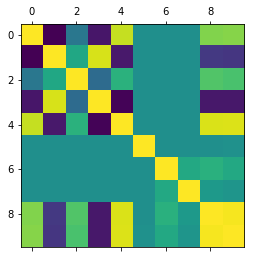

In [107]:
#corrlist = data[['X1','X2','X6','X7','Y1']].corr()
corrlist = data.corr()
print(corrlist)

plt.matshow(corrlist)

##step3 : Feature Engineering (pick up potential features)

### step3.1 basic feature engineering

>1.choose X1,X2,X6,X7

In [108]:
X = data[['X1','X2','X6','X7']]
Y = data[['Y1']]

X.describe()

,X1,X2,X6,X7
count,768.000000,768.000000,768.000000,768.000000
mean,0.764167,671.708333,3.500000,0.234375
std,0.105777,88.086116,1.118763,0.133221
min,0.620000,514.500000,2.000000,0.000000
25%,0.682500,606.375000,2.750000,0.100000
50%,0.750000,673.750000,3.500000,0.250000
75%,0.830000,741.125000,4.250000,0.400000
max,0.980000,808.500000,5.000000,0.400000


In [0]:
X = X.values.reshape(-1,4)
Y = Y.values.reshape(-1,1)

###step3.2 advanced featuer engineering

>1. split your X to Xtrain, Xtest or use KFold to split
>(training/validation/testing)

In [0]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.33, random_state = 42)

##step4 : Build ML model and check score

In [111]:
from sklearn.linear_model import LinearRegression as LR

model = LR()
model.fit(X,Y)

print('score : ',model.score(X,Y))

score :  0.5636784992643233


### other ML

>1. SVR
>2. Decision Tree

In [112]:
from sklearn.svm import SVR

modelSVR = SVR()
modelSVR.fit(X,Y)

print('score : ',modelSVR.score(X,Y))

score :  0.9135063965590701


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [113]:
from sklearn.tree import DecisionTreeRegressor as DTR
modelDTR = DTR(max_depth=2)
modelDTR.fit(X,Y)

print('score : ',modelDTR.score(X,Y))

score :  0.8882242569601309


In [115]:
from sklearn.metrics import mean_squared_error

model.fit(Xtrain,Ytrain)

YtrainPre = model.predict(Xtrain)
YPre = model.predict(Xtest)

mse_train = mean_squared_error(Ytrain, YtrainPre)
mse_test = mean_squared_error(Ytest,YPre)

print("mse_train", mse_train)
print("mse_test", mse_test)

mse_train 44.3437761965974
mse_test 44.61529632512473


###Improved models

>1. try different models
>2. try different parameters
>3. try different features
>4. add data